In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
plt.style.use('seaborn-whitegrid')

In [4]:
# read data in pandas dataframe
df_train =  pd.read_csv('train.csv', nrows = 2000000, parse_dates=["pickup_datetime"])

# list first few rows (datapoints)
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [6]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
df_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [8]:
df_train = df_train[df_train["trip_duration"] >= 0]

In [9]:
len(df_train)

1458644

In [10]:
print(df_train.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


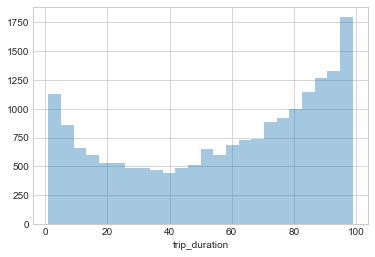

In [11]:
sns.distplot(df_train[df_train["trip_duration"] < 100]["trip_duration"], kde=False);

In [12]:
df_train = df_train.dropna(how='any', axis='rows')

In [13]:
len(df_train)

1458644

In [14]:
df_test = pd.read_csv("test.csv")

In [15]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [16]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [17]:
df_test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [18]:
df_test.isnull().sum().sort_values(ascending=False)

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

<AxesSubplot:ylabel='trip_duration'>

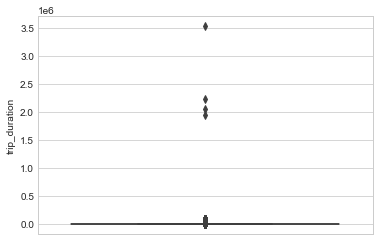

In [19]:
sns.boxplot(
        data = df_train, y = "trip_duration")

In [20]:
df_train = df_train[(df_train["trip_duration"] >= 2.5) & (df_train["trip_duration"] < 75)]  

In [21]:
df_train["trip_duration"].describe()

count    11261.000000
mean        38.098570
std         23.098797
min          3.000000
25%         16.000000
50%         38.000000
75%         60.000000
max         74.000000
Name: trip_duration, dtype: float64

(0.0, 500.0)

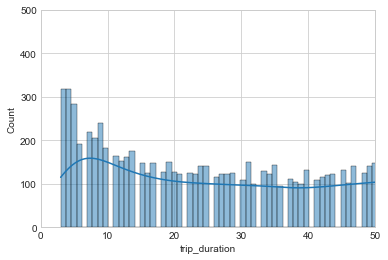

In [22]:
sns.histplot(
    data = df_train, x = "trip_duration", kde = True, bins = 90 )
plt.xlim(0,50)
plt.ylim(0,500)

<AxesSubplot:ylabel='trip_duration'>

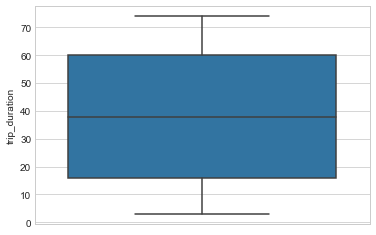

In [23]:
sns.boxplot(
        data = df_train, y = "trip_duration")

In [24]:
df_train['passenger_count'].describe()

count    11261.00000
mean         1.47074
std          1.15055
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          7.00000
Name: passenger_count, dtype: float64

(0.0, 10000.0)

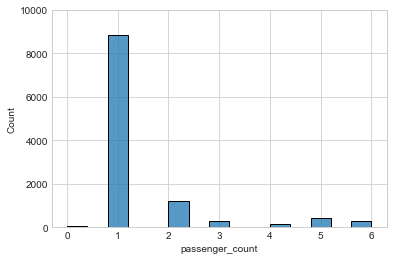

In [25]:
df_train = df_train[df_train["passenger_count"] <= 6]
sns.histplot(
    data = df_train, x = "passenger_count")
plt.ylim(0,10000)

In [26]:
df_train = df_train[(df_train["pickup_longitude"] <= -73.0) & (df_train["pickup_longitude"] >= -74.5)]
df_train = df_train[(df_train["pickup_latitude"] >= 40.5) & (df_train["pickup_latitude"] <= 42)]

df_train = df_train[(df_train["dropoff_longitude"] <= -73.0) & (df_train["dropoff_longitude"] >= -74.5)]
df_train = df_train[(df_train["dropoff_latitude"] >= 40.5) & (df_train["dropoff_latitude"] <= 42)]

In [27]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000
mean,1.439118,1.469803,-73.957602,40.747563,-73.957549,40.747693,38.105399
std,0.496302,1.147792,0.076349,0.050383,0.076337,0.050424,23.102962
min,1.000000,0.000000,-74.459015,40.524899,-74.459000,40.524899,3.000000
25%,1.000000,1.000000,-73.990231,40.731737,-73.990433,40.731842,16.000000
50%,1.000000,1.000000,-73.976379,40.752155,-73.976349,40.751801,38.000000
75%,2.000000,1.000000,-73.951912,40.769648,-73.951687,40.770304,60.000000
max,2.000000,6.000000,-73.195259,41.317879,-73.195259,41.317879,74.000000


In [28]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,N,57
317,id3482709,2,2016-03-21 11:22:48,2016-03-21 11:24:00,1,-73.955193,40.779991,-73.957802,40.776508,N,72
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,N,40
505,id3539226,2,2016-05-05 02:49:46,2016-05-05 02:50:53,1,-74.007004,40.739872,-74.005898,40.740173,N,67
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,N,3
...,...,...,...,...,...,...,...,...,...,...,...
1458044,id3200588,2,2016-03-12 01:35:35,2016-03-12 01:35:42,1,-74.007378,40.739441,-74.007378,40.739449,N,7
1458085,id1326136,2,2016-05-21 12:07:11,2016-05-21 12:07:28,1,-73.978935,40.762463,-73.977654,40.762012,N,17
1458140,id0175875,1,2016-03-22 06:18:10,2016-03-22 06:18:47,1,-73.991325,40.744934,-73.989388,40.748024,N,37
1458544,id3958653,1,2016-06-16 15:10:11,2016-06-16 15:10:49,1,-73.956459,40.767231,-73.956589,40.767269,N,38


In [29]:
df_train.drop(['pickup_datetime'], axis = 1, inplace=True)

In [30]:
df_test.drop(['pickup_datetime'], axis = 1, inplace=True)

In [31]:
df_train.columns

Index(['id', 'vendor_id', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [32]:
train_len = len(df_train)
print(train_len)

11243


In [33]:
df_test.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag'],
      dtype='object')

In [34]:
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [35]:
df = pd.concat([df_train,df_test], axis=0)

In [36]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [37]:
from geopy.distance import geodesic

In [38]:
def get_distance_km(lat1, lon1, lat2, lon2):
    p_point = (lat1, lon1)
    d_point = (lat2, lon2)
    distance_km = geodesic(p_point, d_point).km
    return distance_km

In [39]:
print(len(df))

636377


In [40]:
latitude =  37.389587
longitude =  -121.933128

In [41]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))

-121.9333267211914


In [42]:
print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

-67.49679565429688


In [43]:
print(min(df_train["pickup_longitude"].min(), df_train["dropoff_longitude"].min()))

-74.45901489257811


In [44]:
print(max(df_train["pickup_longitude"].max(), df_train["dropoff_longitude"].max()))

-73.19525909423827


In [45]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))

36.601322174072266


In [46]:
print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

48.85759735107422


In [47]:
print(min(df_train["pickup_latitude"].min(), df_train["dropoff_latitude"].min()))

40.524898529052734


In [48]:
print(max(df_train["pickup_latitude"].max(), df_train["dropoff_latitude"].max()))

41.31787872314453


In [49]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) & 
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))

In [50]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [52]:
nyc_map = plt.imread("C:\coding\R.gif")

In [54]:
df_train = df_train[select_within_boundingbox(df_train, BB)]

In [55]:
print("New size {}".format(len(df_train)))

New size 11200


In [56]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

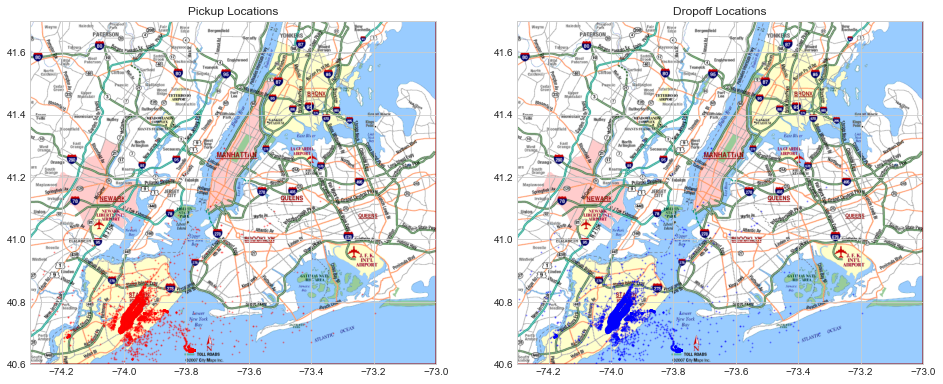

In [57]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

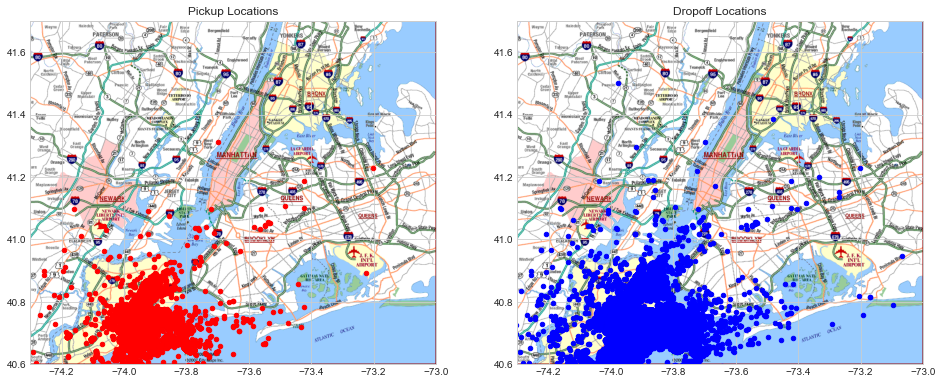

In [58]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

In [59]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

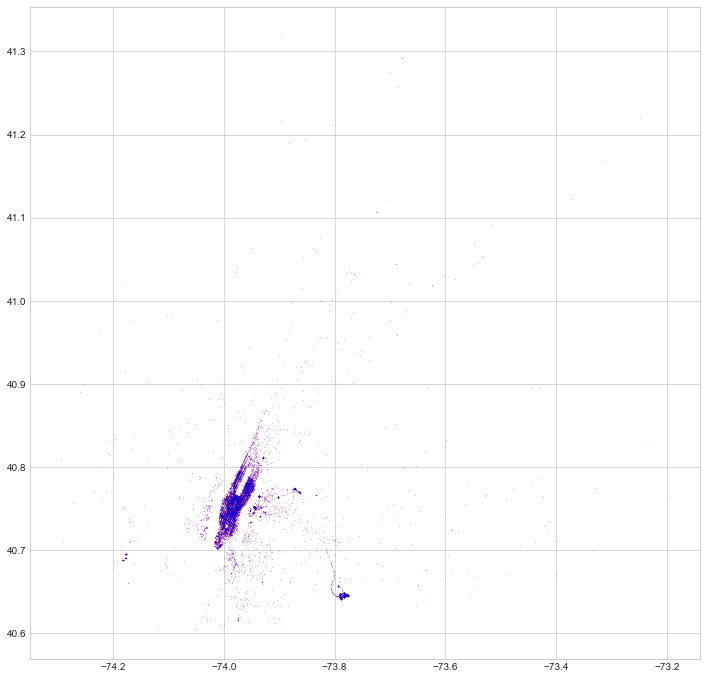

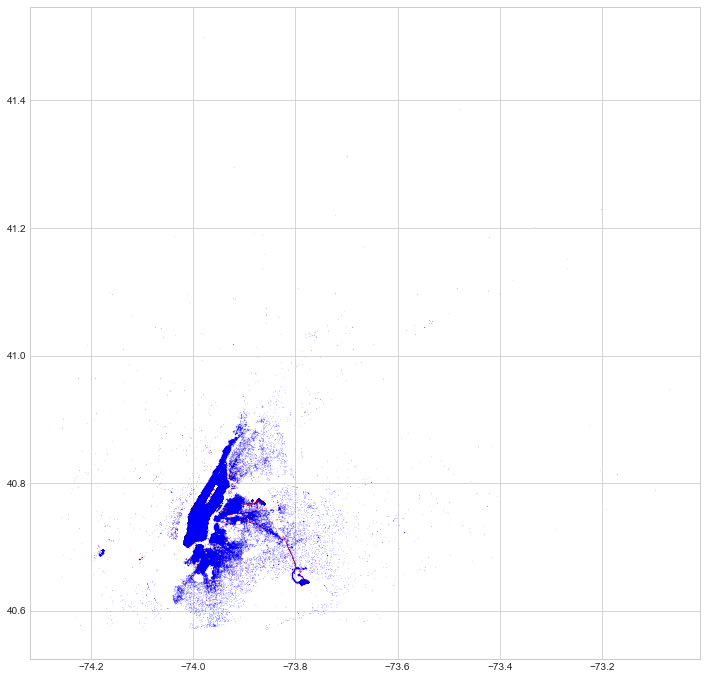

In [60]:
plot_hires(df_train, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df_test, (-74.26, -72.98, 40.57, 41.71))

In [69]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [70]:
df_train["trip_duration"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"], 
                                      df_train["dropoff_latitude"], df_train["dropoff_longitude"])

<ipython-input-70-a6cc22c8bf97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["trip_duration"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"],


In [71]:
df_train.head(2)

,id,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_miles
72,id1510700,2,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,N,0.204016,0.204016
317,id3482709,2,2016-03-21 11:24:00,1,-73.955193,40.779991,-73.957802,40.776508,N,0.276666,0.276666


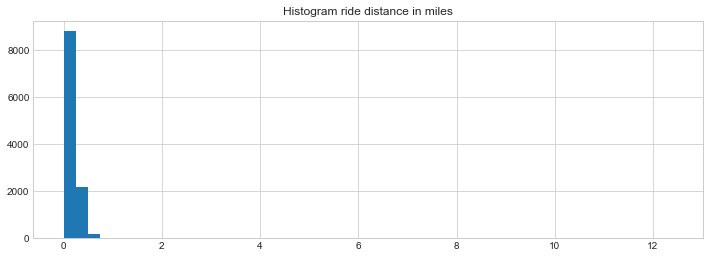

In [72]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [73]:
df_train["distance_miles"].describe()

count    11200.000000
mean         0.124037
std          0.223340
min          0.000000
25%          0.001582
50%          0.045665
75%          0.218987
max         12.395207
Name: distance_miles, dtype: float64

In [75]:
df_train.groupby('passenger_count')['distance_miles','trip_duration'].mean()

<ipython-input-75-1072b73b9d24>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('passenger_count')['distance_miles','trip_duration'].mean()


,distance_miles,trip_duration
passenger_count,,
0,0.014122,0.014122
1,0.119921,0.119921
2,0.128409,0.128409
3,0.138704,0.138704
4,0.123132,0.123132
5,0.158339,0.158339
6,0.185507,0.185507


Text(0.5, 1.0, 'Zoom in on distance < 15 mile and duration <  30 min')

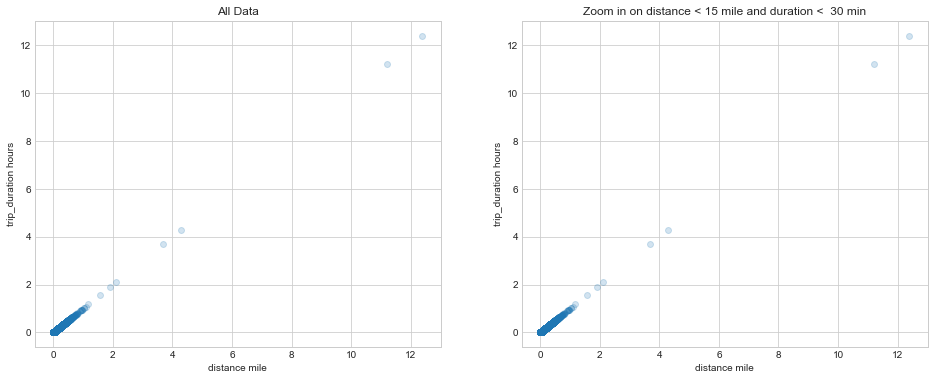

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["trip_duration"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("trip_duration hours")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["trip_duration"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["trip_duration"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("trip_duration hours")
axs[1].set_title("Zoom in on distance < 15 mile and duration <  30 min")

In [78]:
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 11200
New size: 5484


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

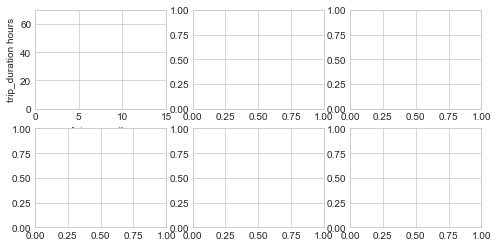

In [99]:
from sklearn.linear_model import LinearRegression

# plot all years
for id in df_train["trip_duration"].unique():
    
    # create figure
    fig, axs = plt.subplots(2, 3, figsize=(8, 4))
    axs = axs.ravel()
    
    # plot for all hours
    
    for passenger_count in range(7):
        idx = (df_train["distance_miles"] < 15) & (df_train["trip_duration"] < 100) & (df_train["passenger_count"] == passenger_count ) & \
              (df_train["id"] ==id )
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["trip_duration"], alpha=0.2, s=0.1)
        axs[h].set_xlabel('distance_miles')
        axs[h].set_ylabel('trip_duration hours')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))
        
        model = LinearRegression(fit_intercept=False)
        
        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["trip_duration"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)
        
    plt.suptitle(" = {}".format(passenger_count))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);


In [100]:
df_train["delta_lon"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
df_train["delta_lat"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]

In [101]:
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

Text(0.5, 1.0, 'log1p(trip_duration)')

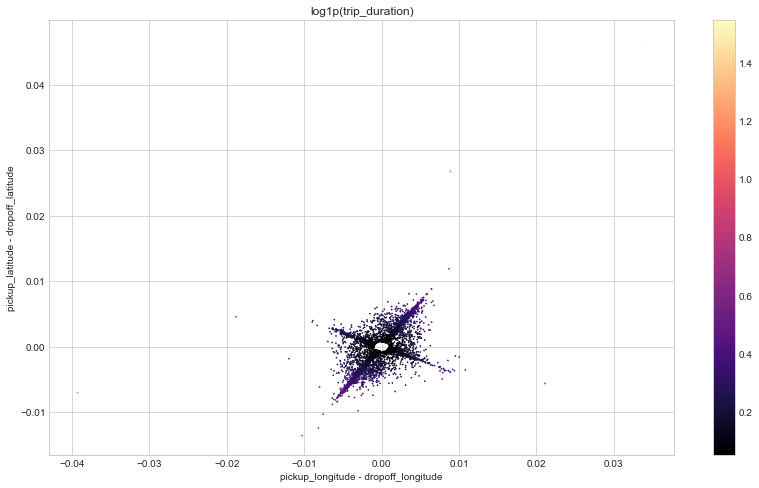

In [102]:
plt.figure(figsize=(14,8))
plt.scatter(df_train[idx_manhattan]["delta_lon"], df_train[idx_manhattan]["delta_lat"], s=0.5, alpha=1.0,
            c=np.log1p(df_train[idx_manhattan]["trip_duration"]), cmap="magma")
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latitude')
plt.title('log1p(trip_duration)')

In [103]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result


In [104]:
df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

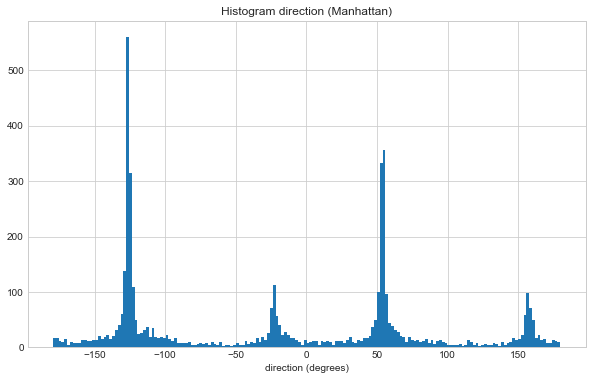

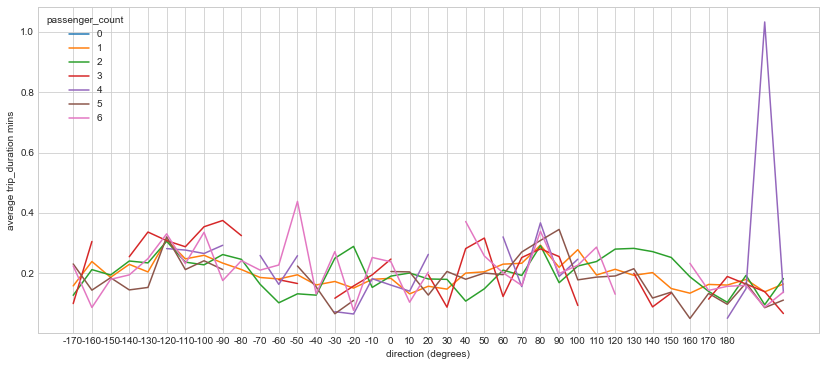

In [105]:
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

df_train[idx_manhattan].pivot_table('trip_duration', index=[direc], columns='passenger_count', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average trip_duration mins');

In [128]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test["pickup_latitude"], df_test["pickup_longitude"], 
                                     df_test["dropoff_latitude"], df_test["dropoff_longitude"])

In [129]:
df_train.head()

,id,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_miles,delta_lon,delta_lat,direction
72,id1510700,2,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,N,0.204016,0.204016,-0.003265,-0.001614,-153.703311
317,id3482709,2,2016-03-21 11:24:00,1,-73.955193,40.779991,-73.957802,40.776508,N,0.276666,0.276666,0.002609,0.003483,53.160237
505,id3539226,2,2016-05-05 02:50:53,1,-74.007004,40.739872,-74.005898,40.740173,N,0.061543,0.061543,-0.001106,-0.000301,-164.761600
853,id2730154,2,2016-03-29 22:40:44,5,-73.982201,40.731812,-73.979950,40.734814,N,0.238563,0.238563,-0.002251,-0.003002,-126.858247
1370,id0802436,2,2016-03-24 16:24:13,1,-73.980858,40.737019,-73.978828,40.736641,N,0.109404,0.109404,-0.002029,0.000378,169.458395


In [130]:
df_test.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_miles
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,N,1.706550
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,N,1.714512
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,N,0.811607
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,N,3.274059
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,N,0.597039


In [132]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train["trip_duration"] < 15) & (df_train["passenger_count"] != 0)

features = [ 'distance_miles', 'passenger_count',]

X = df_train[idx][features].values
y = df_train[idx]['trip_duration'].values

In [133]:
print(X.shape, y.shape)

(5481, 2) (5481,)


In [134]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [135]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

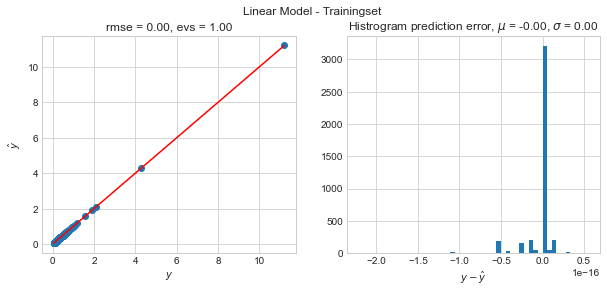

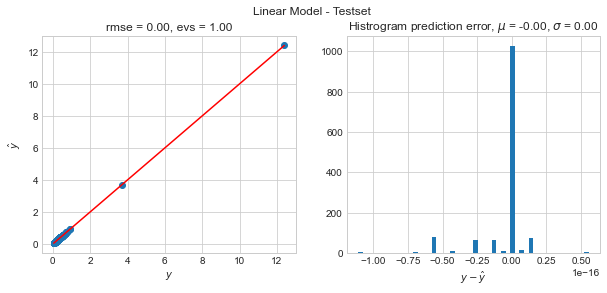

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')
